# Census Income USING MACHINE LEARNING :
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


# Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading csv file

In [65]:
income_data= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [66]:
income_data.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# Gives informaton of the dataset it's type etc

In [43]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


ote: There are 2 data types in the data

object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status

int64: It represents the integer variables. ApplicantIncome is of this format.

Why Data Types are important?

Datatypes are an important concept because statistical methods can only be used with certain data types. You have to analyze continuous data differently than categorical data otherwise it would result in a wrong analysis. Therefore knowing the types of data you are dealing with, enables you to choose the correct method of anal

# Checking null values

In [45]:
income_data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [46]:
income_data.shape

(32560, 15)

In [47]:
income_data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Missing value check

In [48]:
income_data.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [67]:
income_data =income_data.replace(' ?','np.NaN')

In [69]:
income_data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [71]:
# Imputating Missing value with mode for categorical features
income_data['Workclass'].fillna(income_data['Workclass'].mode()[0],inplace=True)
income_data['Occupation'].fillna(income_data['Occupation'].mode()[0],inplace=True)
income_data['Native_country'].fillna(income_data['Native_country'].mode()[0],inplace=True)

In [72]:
#Finding what percentage of data is missing from the dataset
missing_values = income_data.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(income_data))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Age                          0             0.0
Workclass                    0             0.0
Fnlwgt                       0             0.0
Education                    0             0.0
Education_num                0             0.0
Marital_status               0             0.0
Occupation                   0             0.0
Relationship                 0             0.0
Race                         0             0.0
Sex                          0             0.0
Capital_gain                 0             0.0
Capital_loss                 0             0.0
Hours_per_week               0             0.0
Native_country               0             0.0
Income                       0             0.0


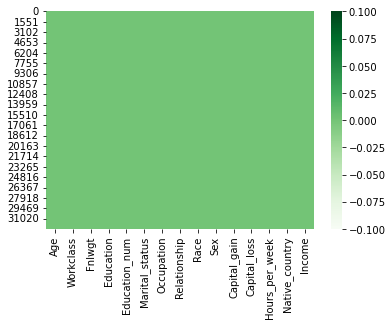

In [54]:
sns.heatmap(income_data.isnull(), cmap="Greens")
plt.show()

# pairplot

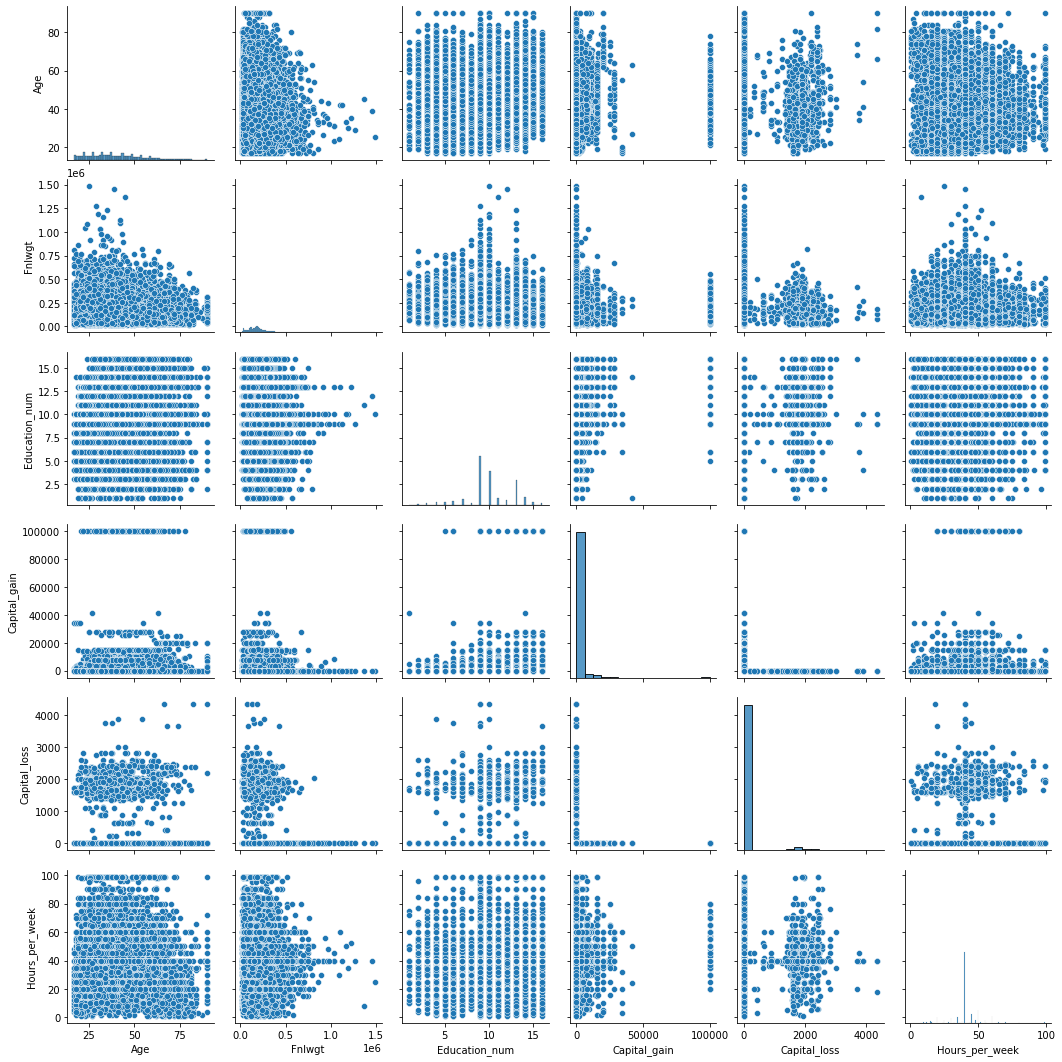

In [55]:
sns.pairplot(income_data)

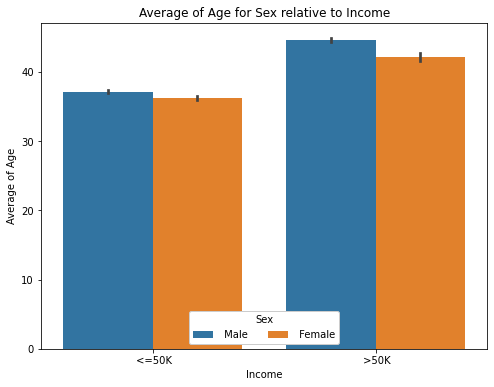

In [57]:
# Clustered Bar Chart 
import seaborn as sb
plt.figure(figsize=[8,6])
ax = sb.barplot(data = income_data, x = 'Income', y = 'Age', hue = 'Sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income')
plt.ylabel('Average of Age');

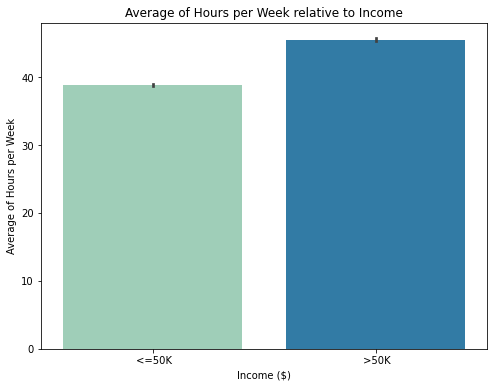

In [58]:
# Bar Chart 
plt.figure(figsize=[8,6])
sb.barplot(data=income_data, x='Income', y='Hours_per_week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

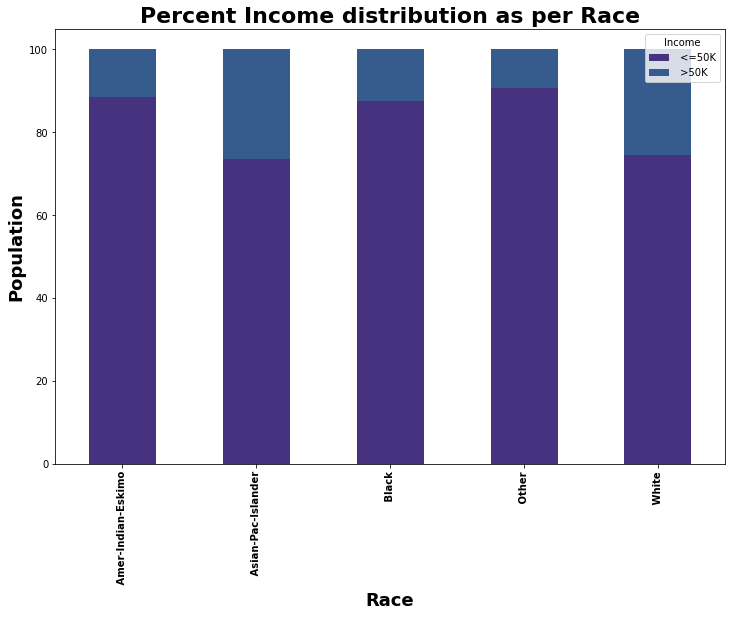

In [59]:
# Percentage Income distribution in terms of Education
sns.set_palette('viridis')
table = pd.crosstab(income_data['Race'], income_data['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Race', fontsize=22, fontweight='bold')
plt.xlabel('Race', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

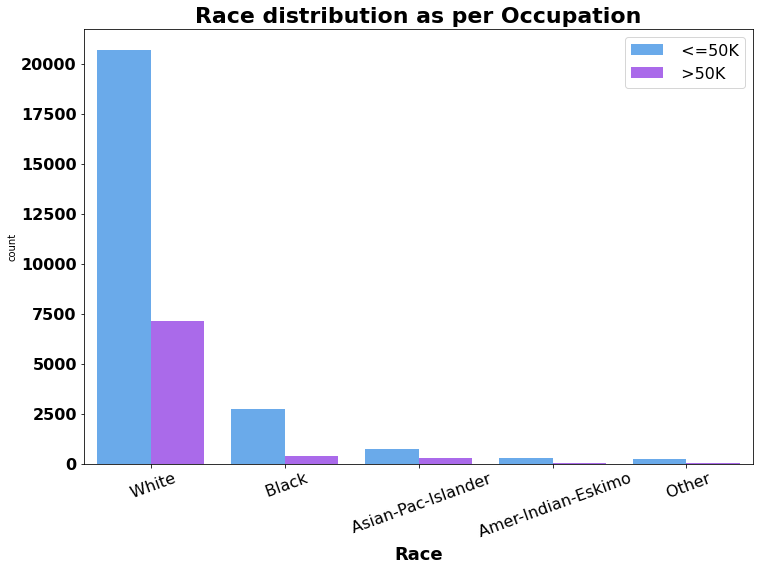

In [73]:
plt.figure(figsize=(12,8))
p = sns.countplot(income_data['Race'], hue=income_data['Income'], palette='cool')
plt.title('Race distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Race',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

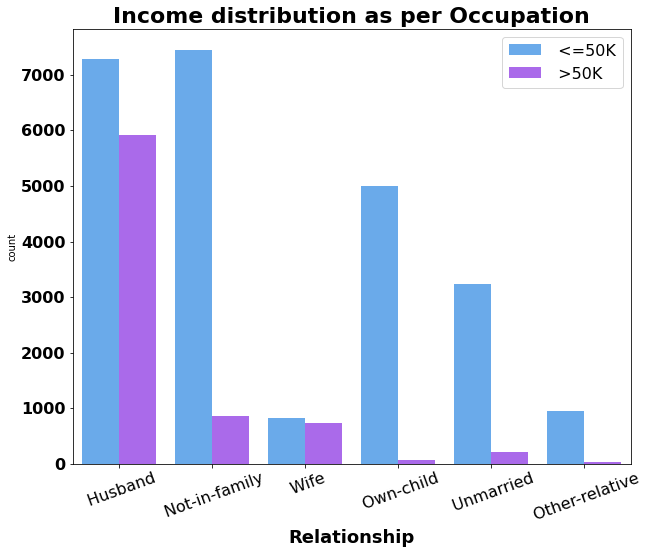

In [74]:
plt.figure(figsize=(10,8))
p = sns.countplot(income_data['Relationship'], hue=income_data['Income'], palette='cool')
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Relationship',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

# Encoding categorical variable

In [75]:
from sklearn.preprocessing import LabelEncoder
for col in income_data.columns:
    if income_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        income_data[col] = encoder.fit_transform(income_data[col])

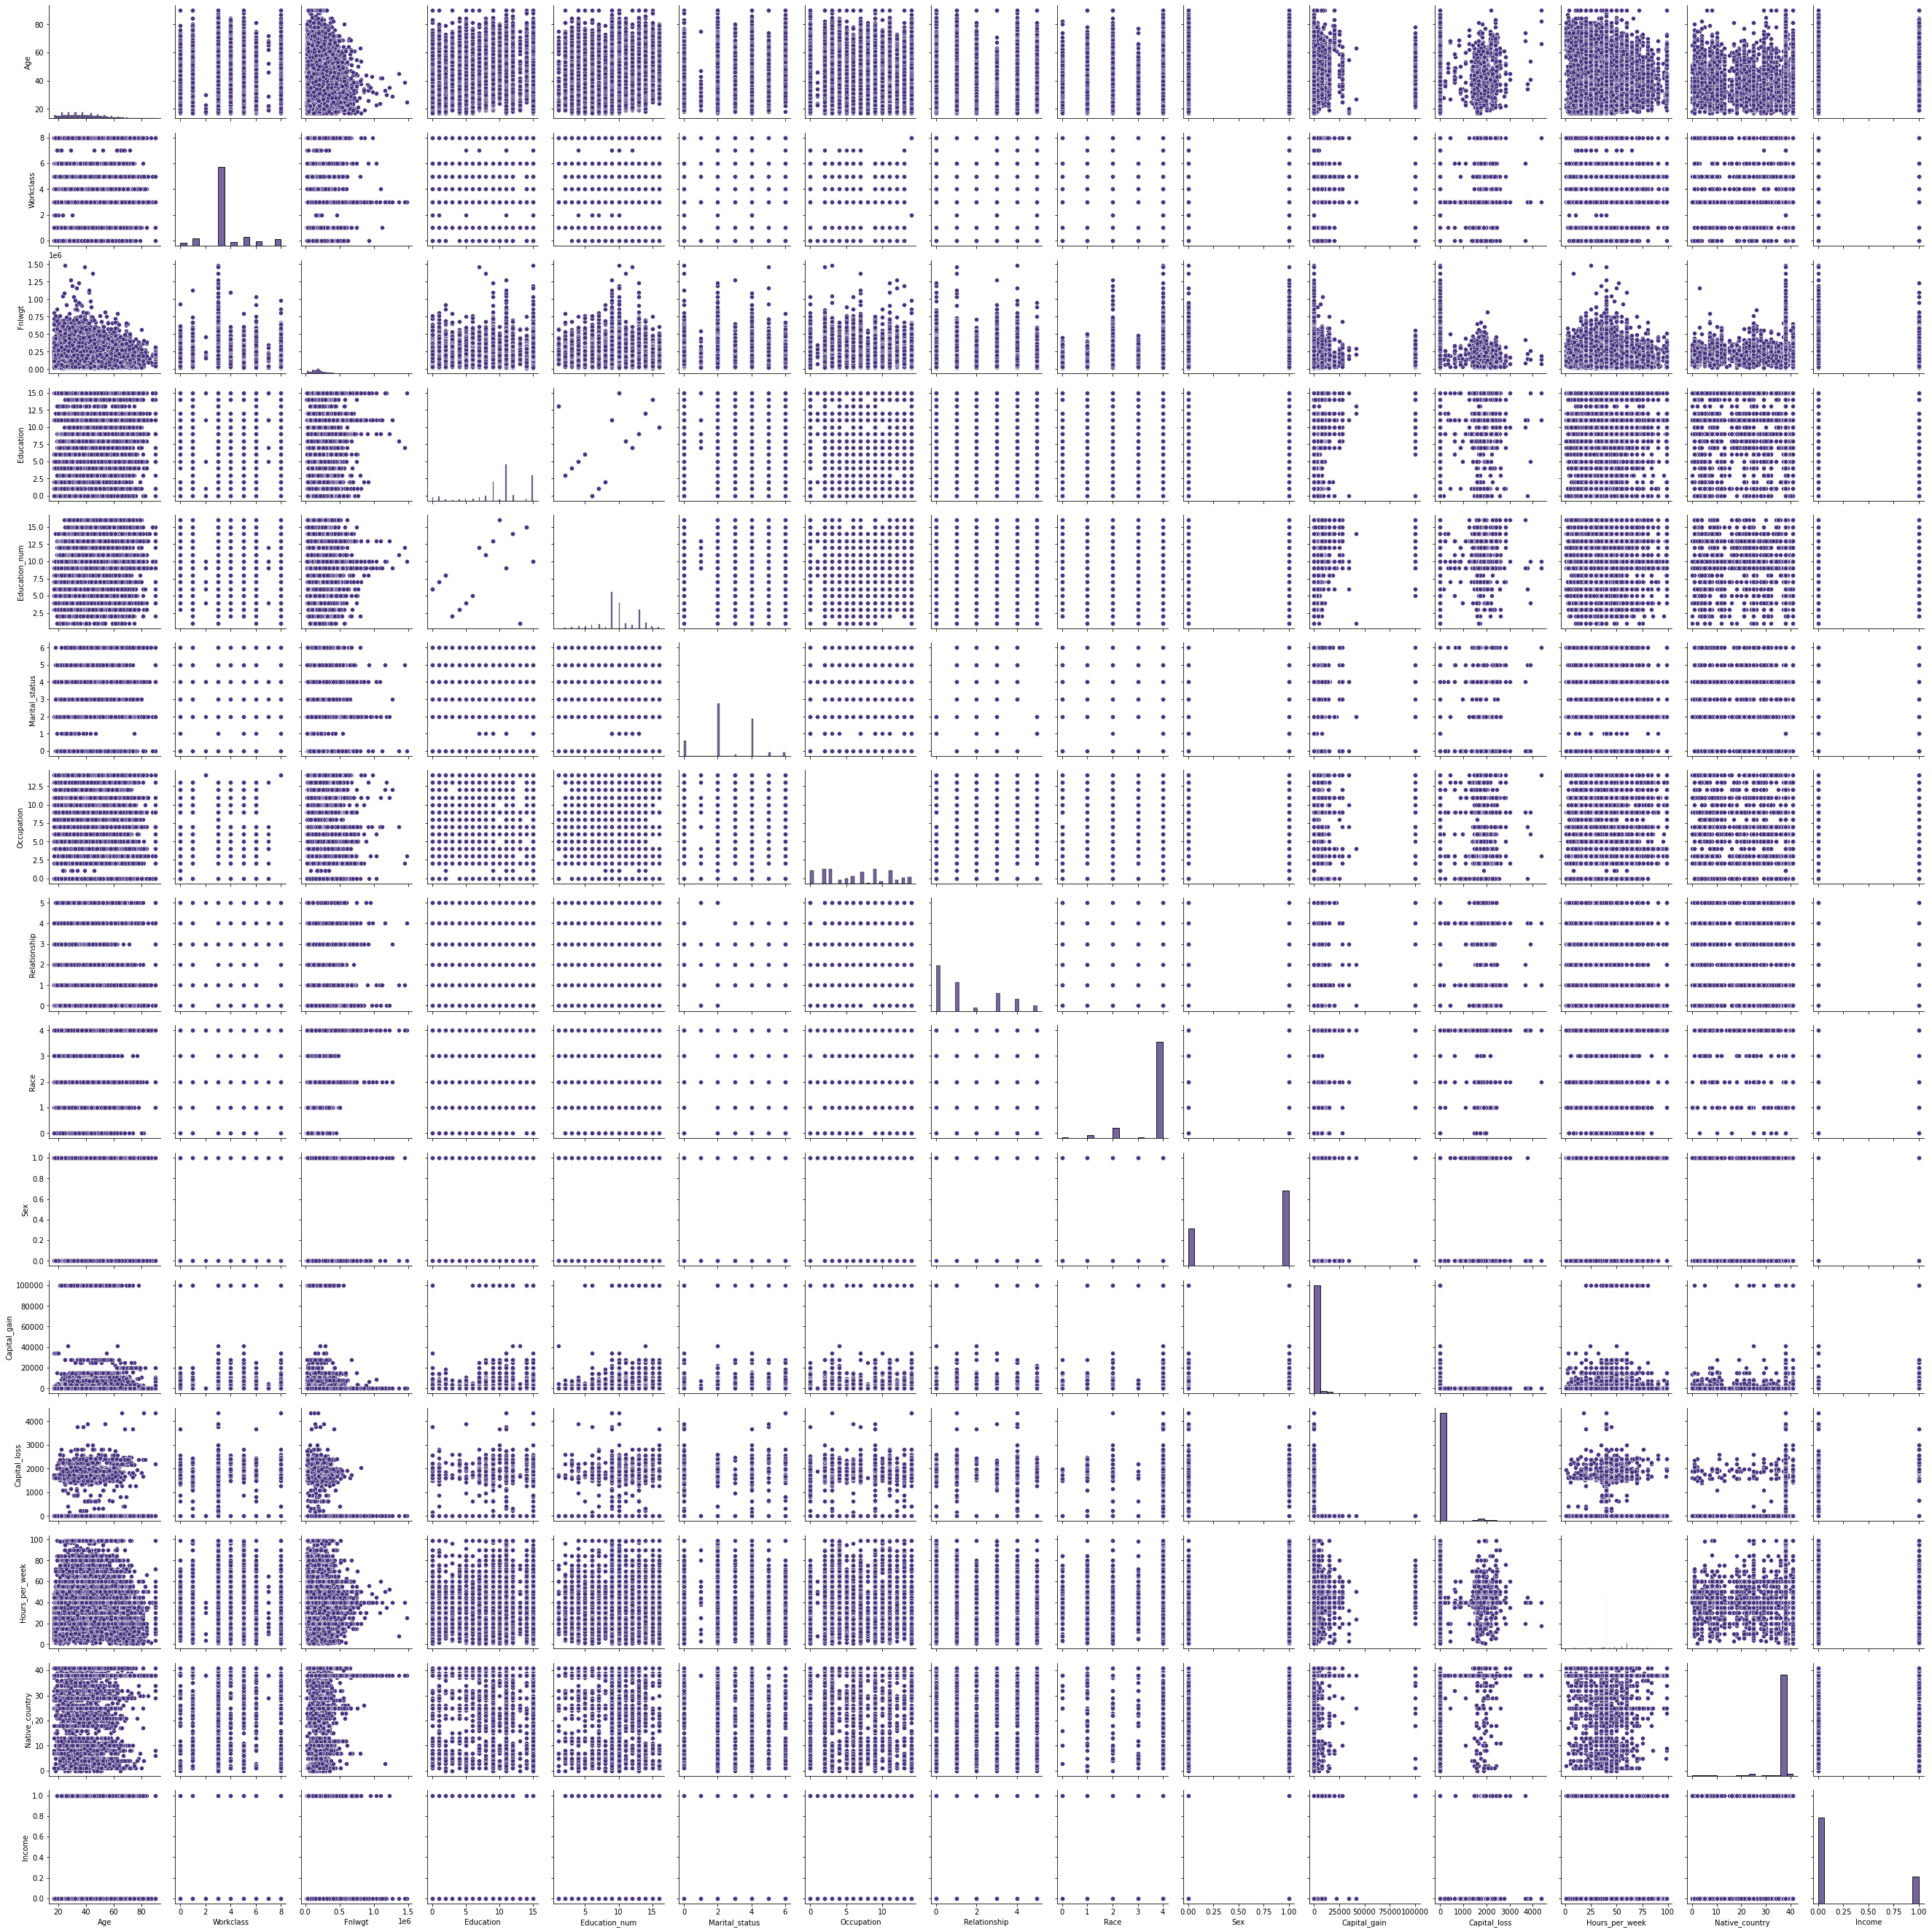

In [76]:
sns.pairplot(income_data)

# Checking Correlation
Checking Correlation Now lets look at the correlation between all the numerical variables. We can use the corr() to compute pairwise correlation of columns, excluding NA/null values using pearson correlation coefficient. Then we will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

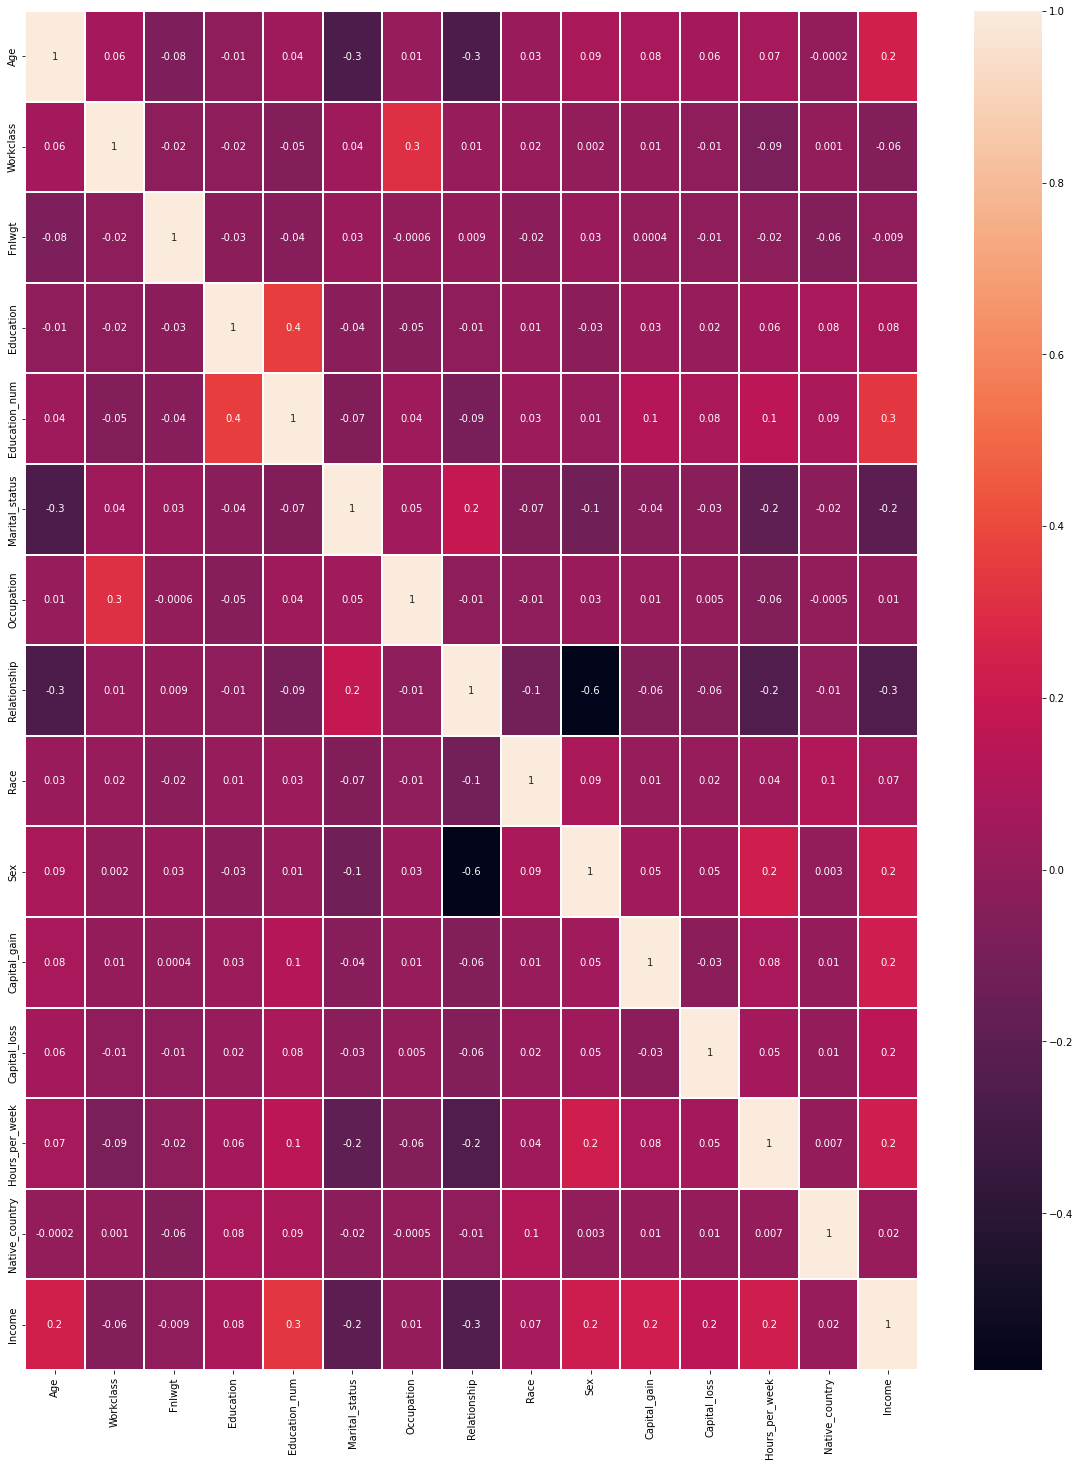

In [78]:
plt.figure(figsize=(20,25))
corr = income_data.corr()
sns.heatmap(data=corr, annot=True, fmt='.1g' ,linewidth= 2)
plt.show()

# Checking outliers

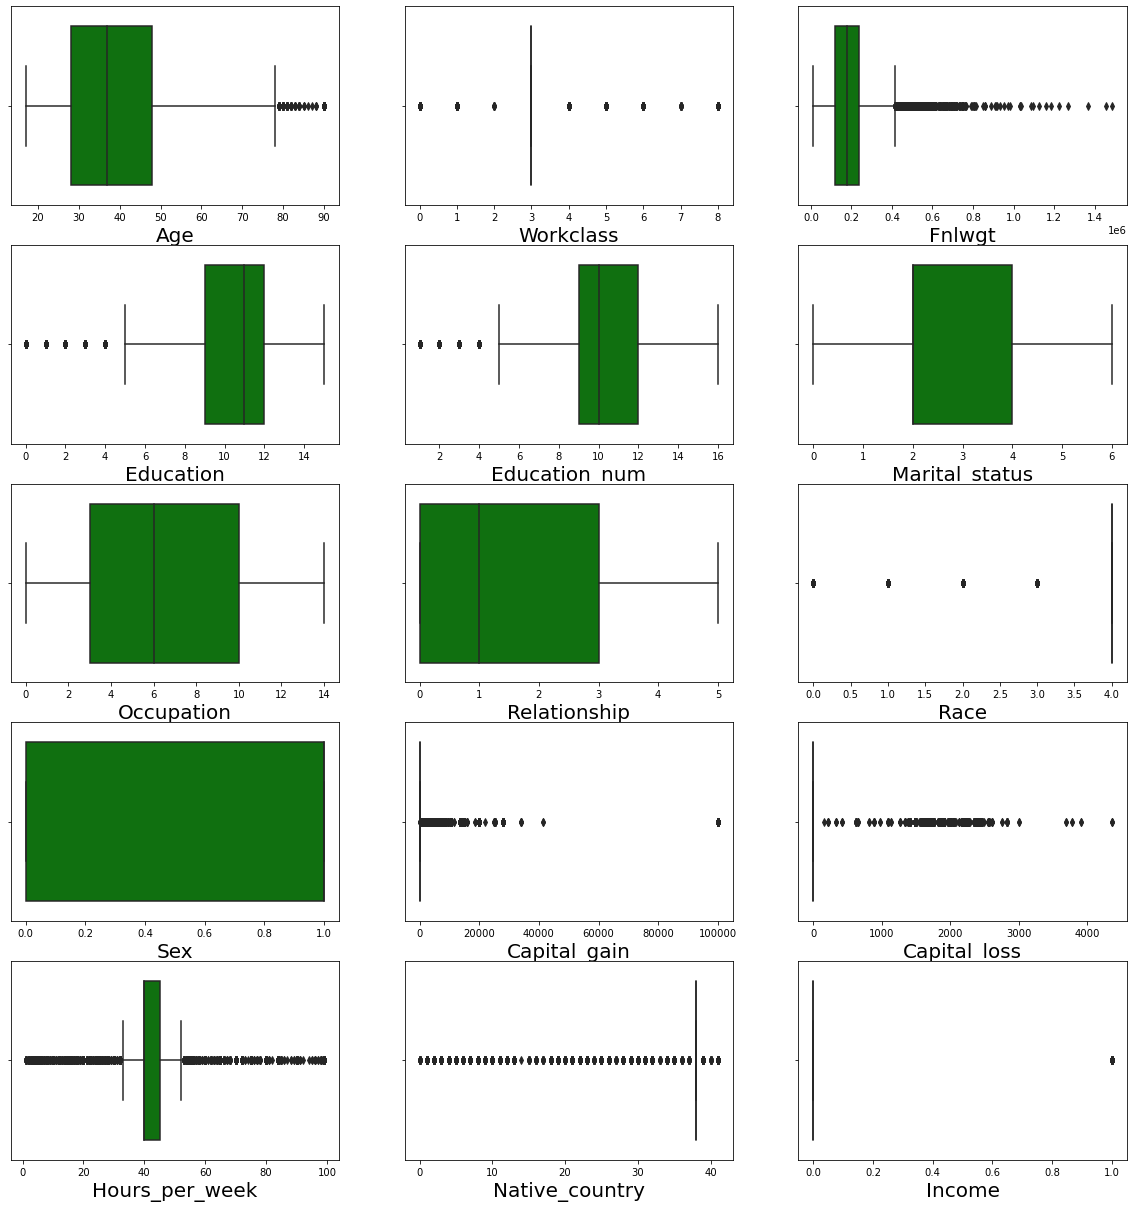

In [79]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in income_data:
    if plotnumber<=25:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(income_data[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Checking Skewness of features

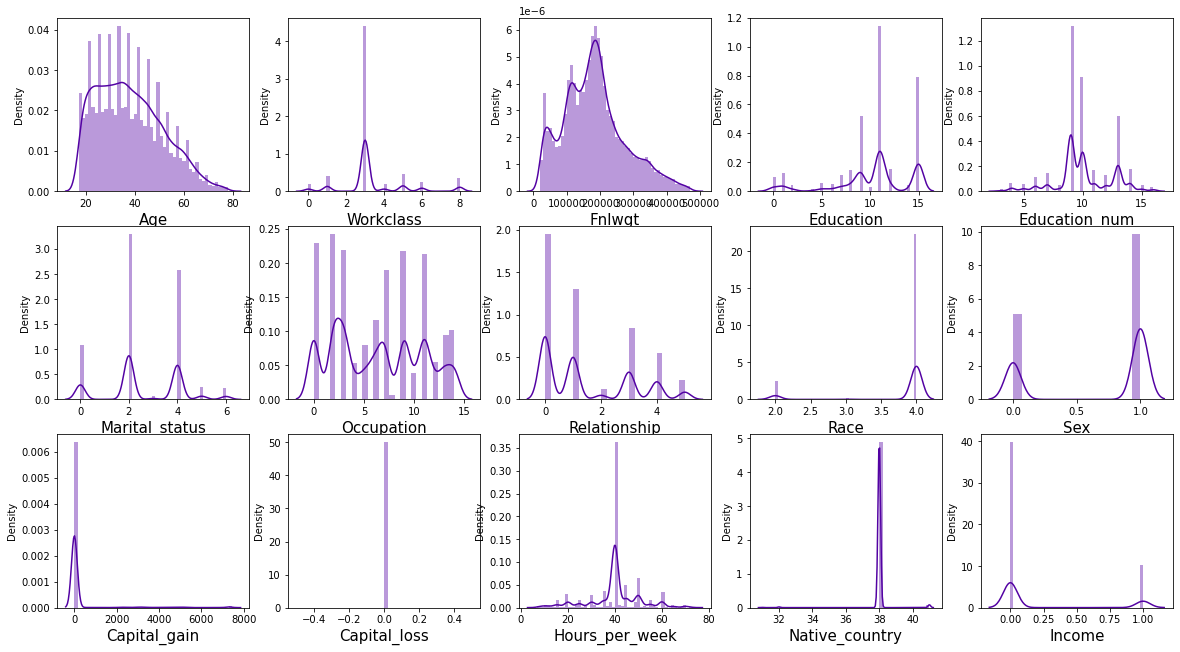

In [85]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in income_data:
    if plotnum<=40:
        plt.subplot(8,5,plotnum)
        sns.distplot(income_data[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

In [86]:
income_data.skew()

Age               0.479489
Workclass         1.181113
Fnlwgt            0.553645
Education        -0.991230
Education_num    -0.044752
Marital_status   -0.064876
Occupation        0.132565
Relationship      0.731202
Race             -2.587020
Sex              -0.666365
Capital_gain      5.111270
Capital_loss      0.000000
Hours_per_week   -0.329545
Native_country   -3.943789
Income            1.462831
dtype: float64

In [87]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['Workclass','Education','Race','Native_country','Relationship']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
income_data[skew] = scaler.fit_transform(income_data[skew].values)

In [88]:
income_data.skew()

Age               0.479489
Workclass         0.137540
Fnlwgt            0.553645
Education        -0.316075
Education_num    -0.044752
Marital_status   -0.064876
Occupation        0.132565
Relationship      0.098815
Race             -2.534955
Sex              -0.666365
Capital_gain      5.111270
Capital_loss      0.000000
Hours_per_week   -0.329545
Native_country    1.221038
Income            1.462831
dtype: float64

In [89]:
income_data.Income.value_counts()

0    20435
1     5264
Name: Income, dtype: int64

In [91]:
X = income_data.drop(columns = ['Income'],axis=1)
Y = income_data['Income']

In [93]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [96]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.215184,Age
1,1.072060,Workclass
2,1.015832,Fnlwgt
3,1.038447,Education
4,1.097395,Education_num
5,1.180877,Marital_status
6,1.072277,Occupation
7,2.020147,Relationship
8,1.051652,Race
9,1.681929,Sex


# Split , Train , Test

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
print('Training feature size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test feature size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training feature size: (28609, 14)
Training target size: (28609,)
Test feature size: (12261, 14)
Test target size: (12261,)


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7140526873827583 on Random_state 122


# General function for train ,test,and predict for census income

In [100]:
def model_val(model,X,Y):
    X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=.30,random_state=122)
    model.fit( X_train,Y_train)
    y_pred=model.predict(X_test)
    print("Accuracy is ", model.score(X_test,Y_test)*100)
    score= cross_val_score(model,X,Y,cv=5) 
    print("Cross validation score is ", np.mean(score)*100)

# Logistics Regression Model

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model= LogisticRegression()
model_val(model,X,Y)

Accuracy is  71.40526873827582
Cross validation score is  58.07682896990458


# DecisionTreeClassifier

In [102]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model_val(model,X,Y)
#classification_report(Y_test, y_pred)

Accuracy is  86.12674333251775
Cross validation score is  84.34793246880352


# Decision Tree
Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

# RandomForestClassifier

In [103]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model_val(model,X,Y)

Accuracy is  89.81322893728081
Cross validation score is  87.67800342549548


# Random Forest
RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model. For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model. Final prediction can be a function of all the predictions made by the individual learners. In case of regression problem, the final prediction can be mean of all the predictions

# ExtraTreesClassifier

In [104]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
model_val(model,X,Y)

Accuracy is  89.55223880597015
Cross validation score is  87.90310741375093


# AdaBoostClassifier

In [105]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model_val(model,X,Y)

Accuracy is  87.79055541962319
Cross validation score is  86.56716417910448


# SGDClassifier

In [106]:
from sklearn.linear_model import SGDClassifier
model= SGDClassifier()
model_val(model,X,Y)

Accuracy is  50.95832313840633
Cross validation score is  50.729141179349156


# GradientBoostingClassifier

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model_val(model,X,Y)

Accuracy is  89.16890955060762
Cross validation score is  87.53853682407635


# SVC

In [108]:
from sklearn.svm import SVC
model= SVC()
model_val(model,X,Y)

Accuracy is  52.418236685425335
Cross validation score is  52.542206997797905


# KNeighborsClassifier

In [109]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
model_val(model,X,Y)

Accuracy is  68.6077807682897
Cross validation score is  69.82872522632736


# Hyper Parameter Tuning : GridSearchCV

In [110]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [20,40,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [100,200,300]}

In [111]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=100
[CV 1/5; 1/36] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=100;, score=0.881 total time=   2.0s
[CV 2/5; 1/36] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=100
[CV 2/5; 1/36] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=100;, score=0.871 total time=   1.3s
[CV 3/5; 1/36] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=100
[CV 3/5; 1/36] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=100;, score=0.882 total time=   1.1s
[CV 4/5; 1/36] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=100
[CV 4/5; 1/36] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=100;, score=0.884 total tim

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 40, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [100, 200, 300]},
             verbose=10)

In [112]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'auto',
 'n_estimators': 300}

In [113]:
model=RandomForestClassifier(n_estimators=300,criterion='entropy', bootstrap= True, max_depth=40, max_features='auto')
model_val(model,X,Y)

Accuracy is  90.04159530217764
Cross validation score is  87.70981159774897


# Final Model 

In [116]:
Final_mod_income = RandomForestClassifier(n_estimators=300,criterion='entropy', bootstrap= True, max_depth=40, max_features='auto')
Final_mod_income.fit(X_train,Y_train)
y_pred=Final_mod_income.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8954408286436669


# Save Model

In [117]:
import joblib
joblib.dump(Final_mod_income,'income_census.pkl')

['income_census.pkl']